c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


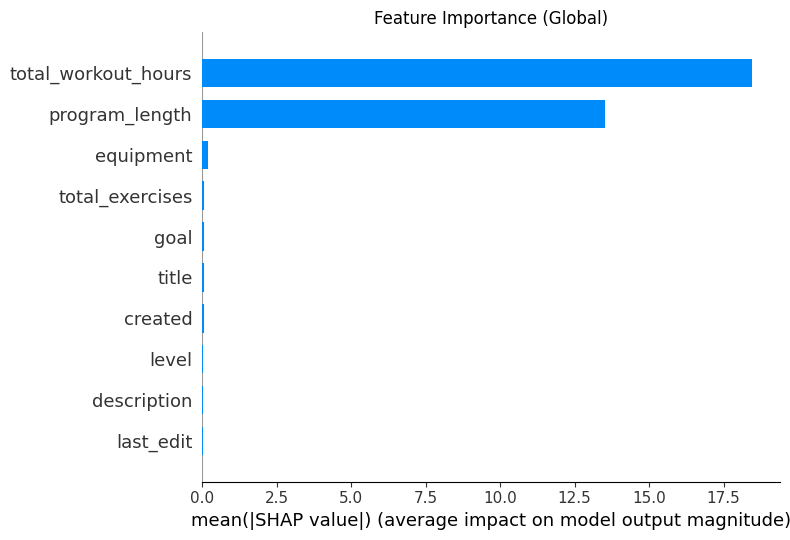

In [2]:
# Phase 5: Model Interpretability using SHAP

import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# ==========================
# 1. Load dataset & models
# ==========================
df = pd.read_csv("fitness_and_workout_dataset_cleaned.csv")
label_encoders = joblib.load("label_encoders.pkl")
time_model = joblib.load("time_per_workout_regressor.pkl")

# ==========================
# 2. Encode dataset for SHAP
# ==========================
encoded_df = df.copy()
for col, le in label_encoders.items():
    if col in encoded_df.columns:
        encoded_df[col] = le.transform(encoded_df[col])

# Features used by the model
feature_cols = [col for col in encoded_df.columns if col != "time_per_workout"]

# ==========================
# 3. Create SHAP explainer
# ==========================
explainer = shap.TreeExplainer(time_model)
shap_values = explainer.shap_values(encoded_df[feature_cols])

# ==========================
# 4. Function to explain a specific recommendation
# ==========================
def explain_recommendation(index):
    """
    index: row index in df for the recommendation
    """
    print(f"\n📌 Explanation for Recommendation #{index}:")
    print(df.iloc[index])  # Show original data for context

    # SHAP force plot (contribution of each feature)
    shap.initjs()
    return shap.force_plot(explainer.expected_value, shap_values[index], encoded_df[feature_cols].iloc[index])

# ==========================
# 5. Global Interpretability
# ==========================
def global_feature_importance():
    plt.title("Feature Importance (Global)")
    shap.summary_plot(shap_values, encoded_df[feature_cols], plot_type="bar")

# ==========================
# 6. Example usage
# ==========================
# Show top important features for all predictions
global_feature_importance()

# Explain first recommended workout (example index: 0)
# You can pass the index from your recommendation results
# Example: force_plot = explain_recommendation(results.index[0])
